Pandas: It is an open-source library that allows to perform data manipulation and analysis in python. It performs data manipulation and data operations for numerical tables and time series. Pandas makes it easier to create, manipulate and preprocess data. Pandas is used for the data analysis, reading.

Numpy: It stands for numerical python. Numpy is one of the Python library used for working with arrays. It is written in three programming languages that are Python, C, C++. Numpy is used for calculating multi-dimensional array.

SciPy: It is an open-source library used for solving mathematical, scientific, engineering, and technical problems. It allows to manipulate the data and visualize the data using a wide range of high level Python commands. It is built on Numpy extension and is a fully-featured version of Linear Algebra. SciPy library is used for the removing the zeros values from the dataset.

Csr: It stands for Compressed Sparse Row matrix. It is efficient when it comes to arithmetic operations, row slicing, fast matrix vector products.
Sklearn: It is a library that contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering, and dimensionality reduction. Here, sklearn library is used to build machine learning model.

K-Nearest Neighbors (KNN): It is a non-parametric lazy learning algorithm. The technique non-parametric is that it does not make any assumptions about the underlying data. KNN is considered as a lazy algorithm as it compares the input features on the basis of measuring distance between the each of the test data like characteristics to declare where the outcome fits completely or near the characters of the features to give out the required output. The dependent attribute is decided by the close related behavior of the features.

Matplotlib: It is a comprehensive library for creating static, animated, and interactive visualizations in Python. It makes possible to do hard things like creates a publication quality plots with just a few lines of code, interactive figures that zoom, update. Allows customizing the line styles, font properties, axes properties.
matplotlib.pyplot: It is a collection of functions that make Matplotlib work like MATLAB. Each pyplot function makes changes to a figure: e.g. creates a figure, plots area in a figure, and plots some lines in a plotting area.

Seaborn: It is a library for making statistical graphics in Python. It is built on top of Matplotlib and integrates closely with pandas and data structures. It helps to understand and explore the data.



Importing all the necessary libraries for building a movie recommendation system.

In [21]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

Importing the datasets that will be used for building this system by adding a proper pathing of the csv files location. 

In [2]:
movies = pd.read_csv('./movies.csv')
ratings = pd.read_csv('./ratings.csv')

dataframe.head() code allows the user to print 5 rows of the dataset

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.shape

(9742, 3)

From the movies dataset we see three different columns movieId, title and genres.

-> movieId - from this column we can get list of all similar                    movieId and get the title for each movie from this                  dataset after the system is completed.

-> genres - this column is not as important for the filtering                   approach that the recommendation is built using. 

In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
ratings.shape

(100836, 4)

Ratings dataset has four columns: userId, movieId, rating and timestamp.

-> userId - it is unique for all users who tends to watch the movie             and rate them.

-> movieId - it is used to take the title of the movies from the                dataset

-> rating - it holds the information of the ratings given by each               user to all the movies they have watched using this we             can predict the top 10 similar movies to recommend the             users.

Here, a new dataframe is created with each columns representing each unique userId and each row representing each unique movieId. 

For the dataset ratings a pivot table is used to reshape the dataframe by oraganizing them by given index i.e. movieId, columns i.e. userId and values i.e. rating. Here we are trying to see each users rating on the movies accesing its movieId.

In [7]:
df =  ratings.pivot(index='movieId', columns='userId',values='rating')
df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


From the pivot table we can see that user with userId 1 has rated movie with movieId 1 and 3 but has not rated movies with movieId 2,4 and 5 that is the reason why thier values is NAN.

Since many of the users has not watched many movies and the values in the table is flooded with NAN the table is hard to understand so, now the NAN is replaced with 0 to make the table look more understandable.

user who have watched the movie has given their ratings and the places where the values are 0 is the movies that the users have not watched therefore with no rating.  

In [8]:
df.fillna(0,inplace=True)
df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


# Removing noise from the data

The data points in real world is very scattered and the priority is given to the movies that are very popular and rated by a lot of users. Here, in this dataset we would not like to deal with movies that has been rated by small number of users cause its not credible as well as we would not like to work with users rating for only handful of movies.

Taking all this in account, now we will try to reduce the noise of the dataset by adding some filters for the final dataset.

Criterias for the qualifications: - 

-> A movie qualifies if it has 10 ratings.

-> A user qualifies if he/she has voted for 50 movies.

Now, we will be working on the filter.

For filtering large amount of dataframe by different variables and apply summary functions on each group grouby() and agg() is used to count the number of user voted and number of movies that are voted.

The filter will first visualise the number of movies that got votes on the threshold of 10. Then counts the number of users that voted movies on the threshold of 50.

In [9]:
number_of_user_voted = ratings.groupby('movieId')['rating'].agg('count')
number_of_movies_voted = ratings.groupby('userId')['rating'].agg('count')

# Visualising the filter

Here, the visualisation is done on the figure with the number of users that have voted is placed on the y label and movieId on the x label. And the criteria of threshold 10 is highlighted with a red line. 

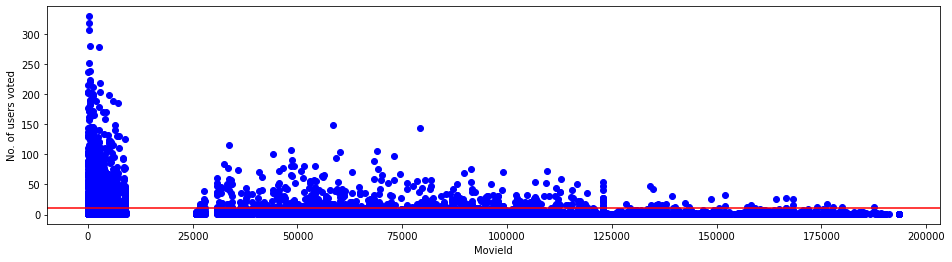

In [10]:
f, ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(number_of_user_voted.index,number_of_user_voted,color='blue')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

The figure shows a lot of uneccessary data points and that points needs to be removed. So, .loc is used to specify the condition on doing that the dataframe will take those data points that only match the condition and forms a dataset removing all the movieId having less than 10 votes as we thought is not credible for the system. 

In [11]:
df = df.loc[number_of_user_voted[number_of_user_voted > 10].index,:]
df

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, the figure will filter the number of user that have voted for less than 50 and more than 50 movies. The filter is shown by the red line drawn between the blue data points. The number of votes by the user is plotted on the y label and the userId is plotted on the x label. 

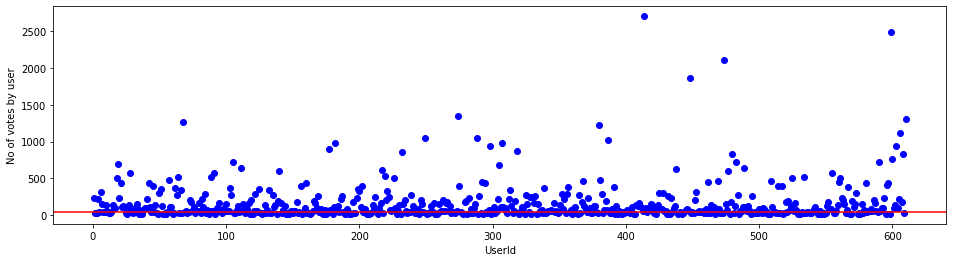

In [12]:
f, ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(number_of_movies_voted.index,number_of_movies_voted,color='blue')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No of votes by user')
plt.show()

From the figure, it is clear that the number of user that have voted for less than 50 movies is a lot and unreliable data points needs filtering. So, .loc command of pandas dataframe is used specifying the condition of the criteria to qualify a worthy asset for the system as a user. It creates a new dataframe removing all the users who have voted for less than 50 movies. Therefore, the dataset is filtered with only user who have voted for more than 50 movies. 

In [13]:
df =  df.loc[:,number_of_movies_voted[number_of_movies_voted > 50].index]
df

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Removing Sparsity 

The above table shows the dataset after filtering has 2121 rows and 378 columns and most of the values contains zero values i.e. sparse. Dealing with this type of matrix is expensive when it comes to computation. So, here we will be reduce the sparsity in the dataset. SciPy library provides implementations that can be used directly to reduce sparsity.  

The below only shows on how the sparsity works. Here, a 3 * 5 sparse matrix is taken in the variable sample and the sparsity formula is initialized by implementing the sparse matrix taken in the sample to convert it into dense matrix i.e. matrix with non-zero values.


In [14]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - (np.count_nonzero(sample) / float(sample.size))
print(sparsity)

0.7333333333333334


Now, csr_matrix is applied on the sample variable that stores the sparse matrix. and after printing the values the sparsity of the matrix is removed only the non-zero values are taken. 

In [15]:
csr_sample = csr_matrix(sample)
print(csr_sample)

  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


Here, for the 0th row and 2nd column the value is 3. Likewise for 1st row and the 0th column the value is 4 all the zeros are removed from the sample sparse matrix.  

Now, applying the csr_matrix to the filtered dataset.

In [16]:
csr_data =  csr_matrix(df.values)
df.reset_index(inplace=True)

# Making the movie recommendation system model

We are making a collaborative filtering based on user behavior.

Collaborative filtering build a model from user's past behavior as well as similar decision made by the other users. Here, this approach is used to recommend users movies based on their search and the similarity plays a vital role on doing so.

KNN algorithm is used to compute similarity with cosine distance metric. 

Cosine Distance

Cosine distance is used to find similarities between different documents. The formula is derived from the equation of dot products. The cosine value will be helpful in determing the similarities. If the cosine value is 1 then the document/vector is pointing in same direction meaning that there are similarities, if the value is 0 then they have some similarities and if the value is -1 then they have no similarities. Cosine distance is preferred more than any other distances because it is very fast in terms of computation.

In [23]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

# Making the recommendation function

The working principle of the function is it first takes the movie name as an input and based on the inputted name first the system checks whether the movie is present in the database or nor if not then a simple message is displayed else the recommendation system finds similar movies and sort them based on the similarity daistance and output only top 10 movies with their distance from the input movie. Here in finding the similar distance the cosine distance comes in handy.

In [24]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = df[df['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = df.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        final = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return final
    else:
        return "No such movies found. Please check your input"   

# Finally, Let's Recommend some movies...

The function is called and the parameter takes a movie name as an input. Here the movie title along with their simalarity distance with the inputted movie name is displayed. 

More the higher similarity distance more high the chance of being recommended at top.

In [25]:
get_movie_recommendation('Matilda')

,Title,Distance
1,Robin Hood (1973),0.556914
2,How the Grinch Stole Christmas (a.k.a. The Gri...,0.550721
3,"Jungle Book, The (1967)",0.548569
4,Peter Pan (1953),0.546689
5,Hercules (1997),0.546068
6,George of the Jungle (1997),0.531779
7,101 Dalmatians (1996),0.531430
8,Space Jam (1996),0.513424
9,James and the Giant Peach (1996),0.502357
10,Homeward Bound: The Incredible Journey (1993),0.454171


From the above result it is clear that the recommendation system is working very well as the movie name inputted the other movie recommendation similar to 'Avengers' are all science fictional movies.
'Avengers' has highest similarity distance with 'Matilda' that means that this system will recommend Matlida at first then Haunting, the and so on according the similar distance calculation. 

To test the system again let's taken another name.

In [26]:
get_movie_recommendation('Toy Story')

,Title,Distance
1,Groundhog Day (1993),0.399495
2,"Lion King, The (1994)",0.398578
3,Pulp Fiction (1994),0.398293
4,Star Wars: Episode VI - Return of the Jedi (1983),0.390663
5,Apollo 13 (1995),0.384633
6,Shrek (2001),0.381472
7,Star Wars: Episode IV - A New Hope (1977),0.380789
8,Toy Story 2 (1999),0.371637
9,Forrest Gump (1994),0.356542
10,Jurassic Park (1993),0.334884


All the movies recommended in Top 10 after 'Toy Story' is entered are animated and kids favorite. So, the system is prefectly working as we have planned. 

# Correlation

The statistical relationship between two variables is referred to as their correlation the relationship can be of any type i.e. One variable could be dependent on the other variable, one variable could be lightly associated with another variable or two variable could depend on a third unknown variable.

Here, we are trying to develop a plain python correlation code based on the user ratings on the particular movie.

Fistly, the two dataset is merged. 

In [27]:
data = pd.merge(ratings, movies)
data.iloc[500:1000]

,userId,movieId,rating,timestamp,title,genres
500,380,47,5.0,1493494893,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
501,381,47,2.0,1166980226,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
502,386,47,3.0,842610286,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
503,387,47,4.5,1094876919,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
504,391,47,3.0,1030944178,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
...,...,...,...,...,...,...
995,374,110,5.0,849089153,Braveheart (1995),Action|Drama|War
996,376,110,3.5,1364993995,Braveheart (1995),Action|Drama|War
997,379,110,5.0,847397381,Braveheart (1995),Action|Drama|War
998,380,110,4.0,1493419805,Braveheart (1995),Action|Drama|War


# Exploratory data analysis

Creating a ratings dataframe with average rating and number of ratings sorted based on the highest rating to the lower order.

The result shows a rating of 5.0 we do not know whether how many users gave that 5.0 rating on the 'Karlson Returns' movie.

In [28]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

Since it is not clear that the ratings is highest or not on that particular movie so we can do is create a new dataframe where we can count the number of ratings given by users on the listed movies.

Visualising the columns Title of the movie and its maximum rating.

In [29]:
data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

The output shows that the movie 'Forrest Gump' has got highest number of users ratings followed by Shawshank Redemption. 

The reason that the recent output does not match the upper output i.e. 'Karlson Returns' because of the above movies are rated by less number of people.

Visualising the count of ratings people have given on that particular movie. 

The mean value of the rating given by the user alongside the number of times the movie is being rated is visualised in the table.

In [30]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
ratings.head(10)

,rating,num of ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
'Tis the Season for Love (2015),1.500000,1
"'burbs, The (1989)",3.176471,17
'night Mother (1986),3.000000,1
(500) Days of Summer (2009),3.666667,42


In [31]:
sns.set_style('white')# the background of the figure will be white
%matplotlib inline#makes sure that the figure is fitted inside the 
#jupyter notebook file.

UsageError: unrecognized arguments: sure that the figure is fitted inside the


Visualising the number of count of people's ratings in a histogram.

<AxesSubplot:>

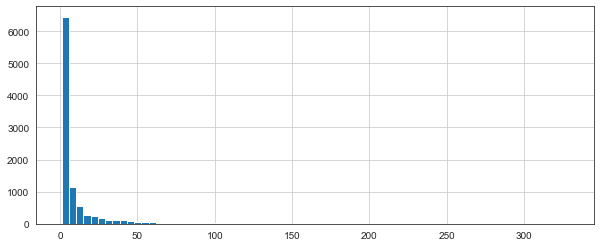

In [32]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

Creating a histogram on the basis of rating. 

<AxesSubplot:>

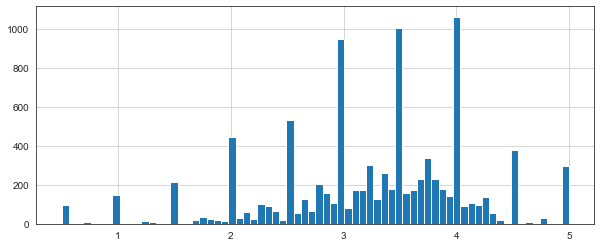

In [33]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins = 70)

From the figure, it is clear that many users have rated movies from 3 to 4. It shows a lot of outliers in the data points.

Joinplot gives both the combination of scatterplot as well as gives the figure of histogram at the top. In the x-axis the 'rating' is plotted and on the y-axis the 'number of ratings' is plotted.

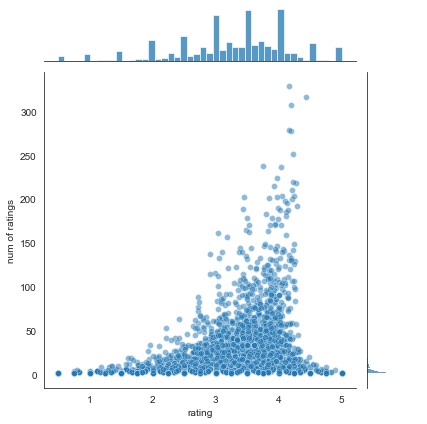

In [34]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

The scatterplots shows that the points where the plots are very densed is the points with highest rating.

# Recommending Similar Movies

Now a matrix for is created for user_id on one access and Title on the other axis. Each cell will consist the rating the user gave to that movie and since many people have not seen the movie most of the values in the cell is NaN.

In [35]:
movie_matrix = data.pivot_table(index = 'userId', columns ='title', values='rating')
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, we will try to find the correlation bwtween the movies with the help of the above formed pivot tables.

In [36]:
ratings.sort_values('num of ratings', ascending = False).head(10)

,rating,num of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


Let's choose Forrest Gump, a comedy movie and Shawshank Redemption, a crime fiction movie.

In [37]:
Forrest_rating= movie_matrix['Forrest Gump (1994)']
shawshank_rating = movie_matrix['Shawshank Redemption, The (1994)']

Forrest_rating.head(10)

userId
1     4.0
2     NaN
3     NaN
4     NaN
5     NaN
6     5.0
7     5.0
8     3.0
9     NaN
10    3.5
Name: Forrest Gump (1994), dtype: float64

The above information shows that user 1 has rated the movie 'Forrest Gump' 4.0, user 2,3,4,5 has not seen the movie.

We can use corrwith() method to get correlation between two pandas series.

In [38]:
similar_to_Forrest = movie_matrix.corrwith(Forrest_rating)
similar_to_shawshank = movie_matrix.corrwith(shawshank_rating)

corr_Forrest = pd.DataFrame(similar_to_Forrest, columns = ['Correlation'])
corr_Forrest.dropna(inplace=True)
corr_Forrest.head(10)


C:\Users\Asus\miniconda3\lib\site-packages\numpy\lib\function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Asus\miniconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000
10 Cloverfield Lane (2016),0.752057
10 Items or Less (2006),-1.000000
10 Things I Hate About You (1999),0.088009
"10,000 BC (2008)",-0.143823


Here, we get correlated values of movies with respect to the movie 'Forrest Gump'. It shows that 'burbs' movie has highest chance of getting recommended as it has highest correlation with the 'Forrest Gump'. Since the maximum number of correlation is 1. Here, the number of movies that are recommended are not exactly correlated.

Here, we will create a dataframe where we can recommend content similar to the movie 'Forrest Gump. And the output seems pretty good the first movie recommended 'Lost & Found' is indeed a comdey movie.

In [39]:
corr_Forrest.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0
Playing God (1997),1.0
Killers (2010),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0


Filtering out the movies that have less than 100 reviews based on the histogram that we visualised earlier.

In [40]:
corr_Forrest = corr_Forrest.join(ratings['num of ratings'])
corr_Forrest.head()

,Correlation,num of ratings
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


Now, sorting the values and only consider movies that have more than 100 ratings on them alongside the correlation with the movie 'Forrest Gump'.

In [41]:
corr_Forrest[corr_Forrest['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Forrest Gump (1994),1.000000,329
Good Will Hunting (1997),0.484042,141
Aladdin (1992),0.464268,183
American History X (1998),0.457287,129
"Truman Show, The (1998)",0.432556,125


The result shows that the highest chance of movie that the user will get recommended is 'Good Will Hunting' if they search 'Forrest Gump' as the distance of correlation is highest of 'Good Will Hunting' with 'Forrest Gump'.

Likewise, Let's do for the movie 'Shawshank Redemption'.

In [42]:
corr_shawshank = pd.DataFrame(similar_to_shawshank,columns=['Correlation'])
corr_shawshank.dropna(inplace=True)
corr_shawshank = corr_shawshank.join(ratings['num of ratings'])
corr_shawshank[corr_shawshank['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
"Shawshank Redemption, The (1994)",1.000000,317
Four Weddings and a Funeral (1994),0.446212,103
Schindler's List (1993),0.402202,220
"Usual Suspects, The (1995)",0.394294,204
Ocean's Eleven (2001),0.391546,119


The output seems quiet impressive as all the movie recommended on searching 'Shawshank Redemption' falls under drama, crime, thriller movies.